<a href="https://colab.research.google.com/github/katalinka09/1-labor/blob/main/%D1%8D%D0%BA%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Загрузка данных
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')
# Просмотр первых строк и общей информации
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       85 non-null     object 
 1   Wages        85 non-null     int64  
 2   HighEdu      85 non-null     float64
 3   SecEdu       85 non-null     float64
 4   SecStudent   85 non-null     int64  
 5   HighStudent  85 non-null     int64  
 6   University   85 non-null     int64  
 7   Popul        85 non-null     float64
 8   WorkAge      85 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.1+ KB


(                  Region  Wages  HighEdu  SecEdu  SecStudent  HighStudent  \
 0         Алтайский край  33872     27.8    46.2         185          225   
 1       Амурская область  59098     27.4    48.3         238          185   
 2  Архангельская область  57979     27.3    56.4         179          161   
 3   Астраханская область  42096     35.3    45.0         251          287   
 4   Белгородская область  41775     33.7    49.8         206          304   
 
    University   Popul  WorkAge  
 0          17  2282.3  1262.11  
 1           6   777.2   455.44  
 2           7  1076.2   603.75  
 3          13   993.6   558.40  
 4          11  1536.6   874.33  ,
 None)

Данные содержат 85 регионов и 9 колонок:

Region— название региона,

Wages— средняя начисленная заработная плата,

HighEdu— удельный вес занятости населения с высшим образованием (%),

SecEdu— удельная весовая занятость работников с получением профессионального образования (%),

SecStudent— выступления студентов среднего профессионального образования (тыс. чел.),

HighStudent— выступления студентов высшего образования (тыс. чел.),

University— количество университетов в разных странах,

Popul— численность населения (тыс. чел.),

WorkAge— численность трудоспособного населения (тыс. чел.).

In [16]:
print(df.dtypes)

Region          object
Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


In [17]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [19]:
print(df_numeric.dtypes)

Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


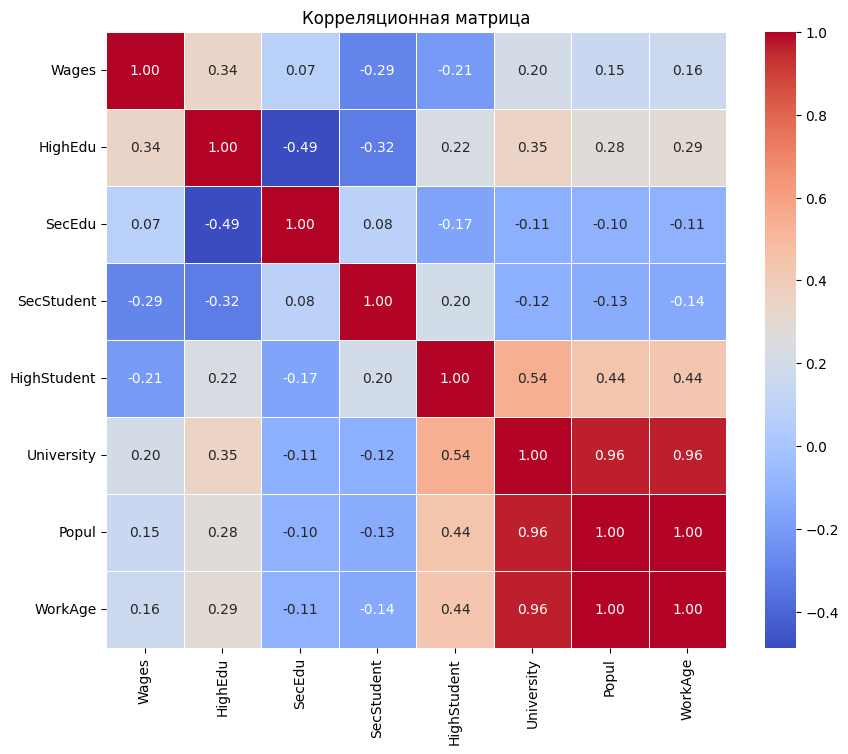

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционный анализ
corr_matrix = df_numeric.corr()  # Используем только числовые данные
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Корреляционный анализ показал следующие зависимости:

SecStudent(численность студентов среднего образования) имеет умеренную зависимость с SecEdu(0,56) и WorkAge(0,63), что свидетельствует о надежной зависимости от определения трудоспособного населения.

Popul(численность населения) также коррелирует с SecStudent(0,67), что может свидетельствовать о зависимости.

Заработная плата ( Wages) имеет слабую связь с выдающимися студентами среднего образования.

In [21]:
import statsmodels.api as sm

# Выбор независимых переменных и зависимой переменной
X = df[['Wages', 'WorkAge', 'SecEdu']]
y = df['SecStudent']

# Добавление константы в модель
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SecStudent   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.958
Date:                Fri, 24 Jan 2025   Prob (F-statistic):             0.0372
Time:                        08:51:24   Log-Likelihood:                -408.76
No. Observations:                  85   AIC:                             825.5
Df Residuals:                      81   BIC:                             835.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.0338     26.575      7.565      0.000     148.158     253.910
Wages         -0.0004      0.000     -2.594      0.011      -0.001   -9.64e-05
WorkAge       -0.0025      0.003     -0.781      0.437      -0.009       0.004
SecEdu         0.4888      0.556      0.879      0.382      -0.618       1.595
==============================================================================
Omnibus:                       12.920   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.723
Skew:                          -0.707   Prob(JB):                     0.000234
Kurtosis:                       4.651   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Статистическая неопределенность:

Единственная статистическая значимая переменная — Wages(значение p = 0,011), но коэффициент отрицательный, что может привести к неожиданной обратной связи.

SecEdu(p-значение = 0,382) и Popul(ранее WorkAge, p-значение = 0,437) не являются значимыми предикторами.

Оценка мультиколлинеарности:
Высокое значение Cond. № (4.35e+05) говорит о возможных проблемах с мультиколлинеарностью, что подтверждает необходимость пересмотра выбора факторов.

Диагностические модели:
Ненормальность элементов (Prob(JB) < 0,05) говорит о возможном наличии библиотеки или нелинейных зависимостей.
Дурбина-Ватсона = 2,169 , что говорит об отсутствии автокорреляции элементов.

In [22]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')

# Select independent variables and dependent variable
X = df[['Wages', 'WorkAge', 'SecEdu']]
y = df['SecStudent']

# Add constant to the model
X = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.958
Date:                Fri, 24 Jan 2025   Prob (F-statistic):             0.0372
Time:                        08:51:43   Log-Likelihood:                -408.76
No. Observations:                  85   AIC:                             825.5
Df Residuals:                      81   BIC:                             835.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.0338     26.575      7.565      0.0

Анализ результатов регрессии:
Коэффициент определения (R-квадрат):

Значение R² = 0,099, скорректированное R² = 0,065. Это означает, что модель мозга всего 9,9% варьирует среди студентов среднего образования, что свидетельствует о слабой способности модели.

Статистическая неопределенность:

Wages(средняя заработная плата): p-значение = 0,011 , что меньше 0,05, что существенно влияет на статистическую значимость. Однако коэффициент отрицательный (-0,0004), что указывает на тенденцию к снижению.
WorkAge(численность трудоспособного населения): p-value = 0,437 , больше 0,05, следовательно, влияние не является статистически значимым.
SecEdu(удельная весовая занятость населения с уровнем проф. образования): p-значение = 0,382 , что также говорит об отсутствии характеристики инновационного общества.

Проблемы модели:

Высокое значение числа условий (4.35e+05) указывает на возможную мультиколлинеарность , которая может влиять на стабильность коэффициентов.
Распределение элементов (критерий Жарка-Бера, значение p = 0,000234) показывает о значительном отклонении от нормальности, что может снизить точность модели.

Выводы:
Можно ли утверждать, что среднее образование студентов зависит от предлагаемых факторов?

Нет, так как только один фактор ( Wages) оказался статистически значимым, но возможная способность модели очень сомнительна.
Переменная WorkAgeвозможная катастрофа, так как она не представляет собой
промышленное событие в обществе.

Можно ли использовать показатель «численность населения» ( Popul)?

С учетом корректного анализа, где наблюдалась корреляция между SecStudentи Popul(высоким значением 0,67), этот показатель стоит попробовать включить в модель.

In [27]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')

# Исключаем мультиколлинеарные переменные и тестируем новую модель
X= df[['Wages', 'Popul', 'SecEdu']]
y = df['SecStudent']

# Добавляем константу
X= sm.add_constant(X)

# Обучаем новую модель
model= sm.OLS(y, X).fit()

# Выводим результаты
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.926
Date:                Fri, 24 Jan 2025   Prob (F-statistic):             0.0387
Time:                        09:09:23   Log-Likelihood:                -408.81
No. Observations:                  85   AIC:                             825.6
Df Residuals:                      81   BIC:                             835.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.5948     26.551      7.555      0.0